In [1]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
from datetime import datetime, timedelta

In [2]:
pop_size = 3.3e8
# SARS-Cov-2 (COVID-19)
y = 1/14
sigma = 1/4.5

In [3]:
246000/11200000

0.021964285714285714

In [6]:
class EpidemicModel:
    def __init__(self,x ,date_start, date_end,R0, natural_death_rate=0.00888, disease_death_rate=0.02, birth_rate=.01199, exposure_rate = 0.01, infectious_rate = 0.01, recovery_rate = 0.01):
        # x is state vector which contains (susceptible, exposed, infectious)
        self.x = x
        self.date_start = date_start
        self.date_end = date_end
        self.current_date = date_start
        self.R0 = R0
        #self.decodeVector()
        self.susceptible = x[0]
        self.exposed = x[1]
        self.infections = x[2]
        self.natural_death_rate = natural_death_rate
        self.disease_death_rate = disease_death_rate
        self.birth_rate = birth_rate
        self.exposure_rate = exposure_rate
        self.infectious_rate = infectious_rate
        self.recovery_rate = recovery_rate
        self.immune = {}
        
        
     
    def main(self):
        time_elapsed = int((self.date_end - self.date_start).days)
        susceptible_pop = []
        exposed_pop = []
        infections_pop = []
        for t in range(time_elapsed):
            self.current_date = date_start + timedelta(days=t)
            #print('currentDate', self.current_date)
            self.born()
            self.natural_death()
            self.exposure()
            self.infected()
            self.die_from_disease()
            self.recover()
            self.check_still_immune()
            #self.decodeVector()
            #print('susceptible ', self.susceptible)
            #print('exposed', self.exposed)
            susceptible_pop.append(self.susceptible)
            exposed_pop.append(self.exposed)
            infections_pop.append(self.infections)
        return susceptible_pop, exposed_pop, infections_pop
    
    def check_still_immune(self):
        for recovered_date in list(self.immune):
            days_elapsed = (self.current_date - recovered_date).days
            if days_elapsed > 1096:
                self.susceptible += self.immune[recovered_date]
                del self.immune[recovered_date]
               
    
            
    #def decodeVector(self):
        #if(self.x):
            #self.susceptible, self.exposed, self.infectious = self.x
    
    def exposure(self):
        n_exposed = self.susceptible * self.exposure_rate
        self.susceptible -= n_exposed
        self.exposed += n_exposed
    
    def infected(self):
        n_infected = self.exposed * self.infectious_rate
        self.exposed -= n_infected
        self.infections += n_infected
    
    def natural_death(self):
        random_d = random.randint(0,2)
        vector = self.x
        vector[random_d] *= (1- self.natural_death_rate)
        self.x = vector
        
    def born(self):
        self.susceptible *= (1 + self.birth_rate)
        
    def die_from_disease(self):
        self.infections *= (1 - self.disease_death_rate)
        
    # def flys_in(self):
        # self.infections *= (1 + flys_in_rate)
        
    def recover(self):
        n_recovered = self.infections * self.recovery_rate
        self.infections -= n_recovered 
        self.immune[self.current_date] = n_recovered


0.18518142131274035


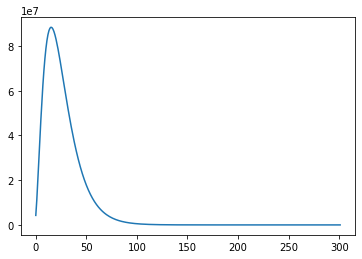

In [7]:
x = [329201263,1,1]
date_start= datetime(2020,1,21)
date_end = datetime.now()
disease_death_rate = 774/8098
exposure_rate = 1/5
infectious_rate = 1/14
recovery_rate =  1/90
model = EpidemicModel(x, date_start,date_end,R0 = 1.875, exposure_rate=exposure_rate, disease_death_rate = disease_death_rate, infectious_rate= infectious_rate, recovery_rate = recovery_rate)

susceptible_pop, exposed_pop, infections_pop  = model.main()
plt.plot(infections_pop)
#self.total_pop = 
print(infections_pop[-1])


In [6]:
def F(x, t, R0=3):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    susceptible, exposed, infectious = x
    print(x)

    # New exposure of susceptibles
    b = R0(t) * y if callable(R0) else R0 * y
    ne = b * susceptible * infectious

    # Time derivatives
    ds = - ne
    de = ne - sigma * e
    di = sigma * e - y * i

    return ds, de, di

In [7]:
# initial conditions of s, e, i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

In [8]:
x_0 = s_0, e_0, i_0

In [9]:
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path

In [10]:
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [11]:
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

[9.999995e-01 4.000000e-07 1.000000e-07]


NameError: name 'e' is not defined

In [12]:
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

No handles with labels found to put in legend.


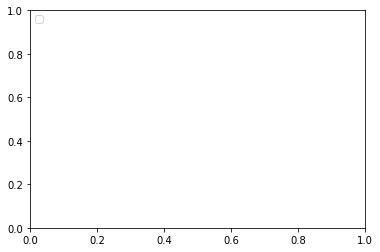

In [13]:
plot_paths(i_paths, labels)

No handles with labels found to put in legend.


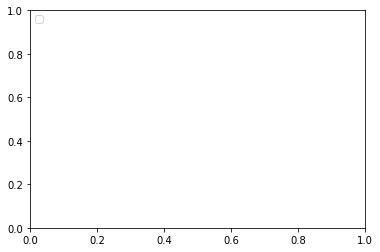

In [14]:
plot_paths(c_paths, labels)